## CASE STUDY: DIABETES CLASSIFICATION
## PROBLEM STATEMENT:
### Build a model to accurately predict whether the patients in the dataset have diabetes or not?

Dataset Description:

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0


## IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()
# Glucose, BloodPressure, SkinThickness, Insulin and BMI have a value of zero which does not make any sense.
# We treat them as missing values.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning

In [7]:
print((df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [8]:
#  We will remove the following rows: “BloodPressure”, “BMI” and “Glucose” .
df= df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]

In [9]:
print('Now New Diabetes data set contain: {} rows and {} columns'.format(df.shape[0], df.shape[1]))

Now New Diabetes data set contain: 724 rows and 9 columns


In [10]:
# first we will replace zeros with NaN and then fill the NAs with its median values.
df[['SkinThickness','Insulin']] = df[['SkinThickness','Insulin']].replace(0,np.NaN)

In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
median_skin=df['SkinThickness'].median()
df['SkinThickness']=df['SkinThickness'].fillna(median_skin)

median_insulin=df['Insulin'].median()
df['Insulin']=df['Insulin'].fillna(median_insulin)

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,125.5,33.6,0.627,50,1
1,1,85,66,29.0,125.5,26.6,0.351,31,0
2,8,183,64,29.0,125.5,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.133978,142.044199,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.019267,88.713438,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,118.250000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.500000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## VISUALIZING THE DATA

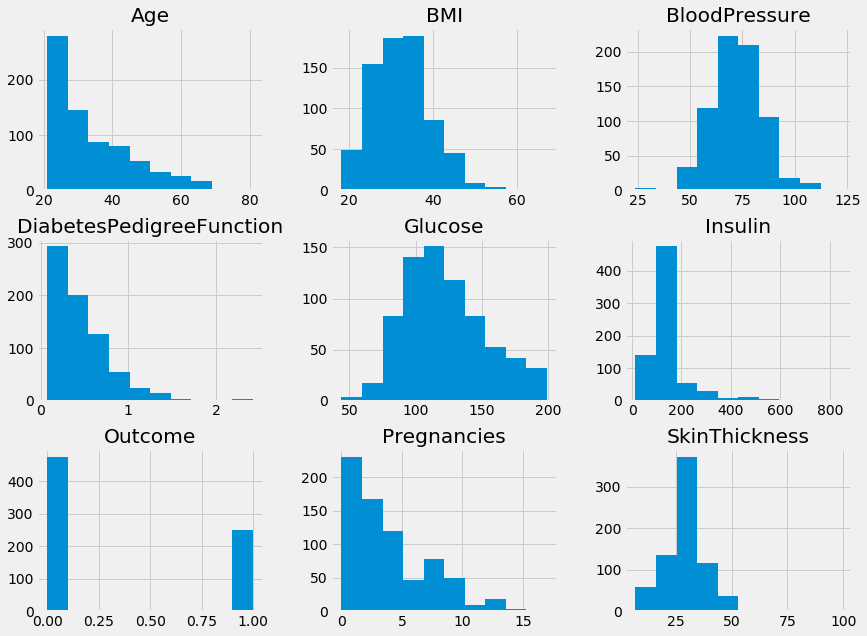

In [16]:
plt.style.use("fivethirtyeight")
df.hist(figsize=(13,10));

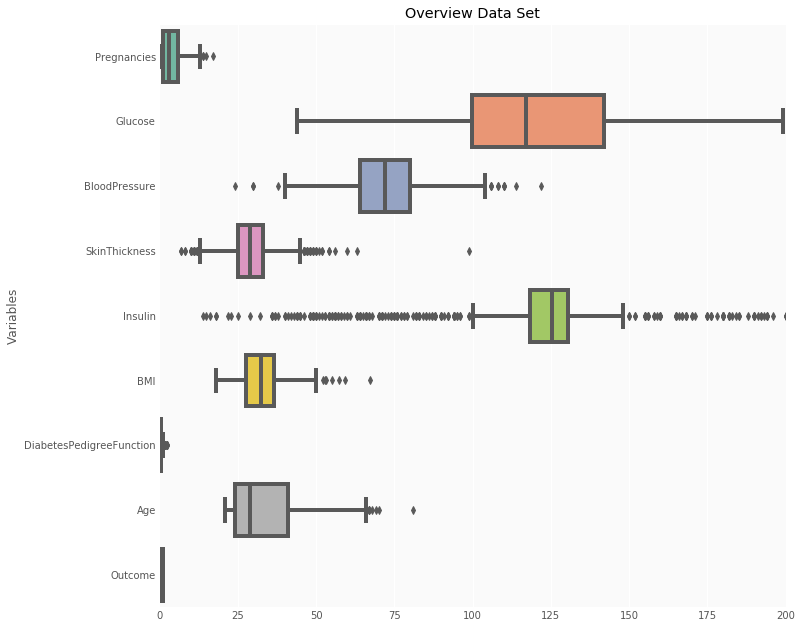

In [17]:
plt.style.use('ggplot')

f, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

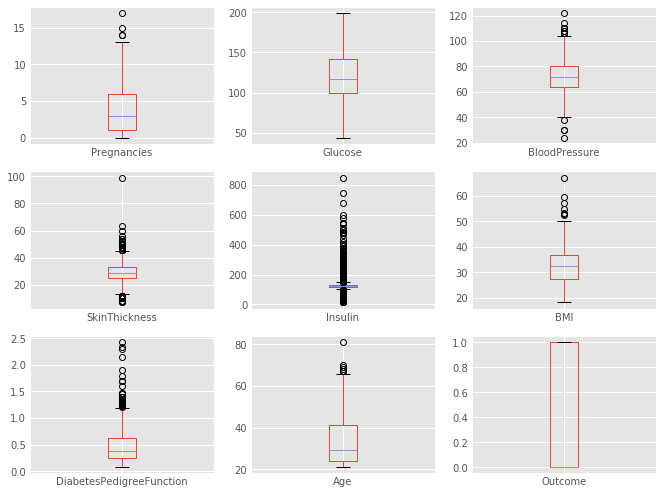

In [18]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8));

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.134915       0.209668       0.078710   
Glucose                      0.134915  1.000000       0.223331       0.195340   
BloodPressure                0.209668  0.223331       1.000000       0.191570   
SkinThickness                0.078710  0.195340       0.191570       1.000000   
Insulin                      0.023269  0.427117       0.045832       0.154145   
BMI                          0.012342  0.223276       0.287403       0.555098   
DiabetesPedigreeFunction    -0.025996  0.136630      -0.000075       0.106670   
Age                          0.557066  0.263560       0.324897       0.124268   
Outcome                      0.224417  0.488384       0.166703       0.216357   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.023269  0.012342                 -0.025996   
Glucose                   0.427117  0.223

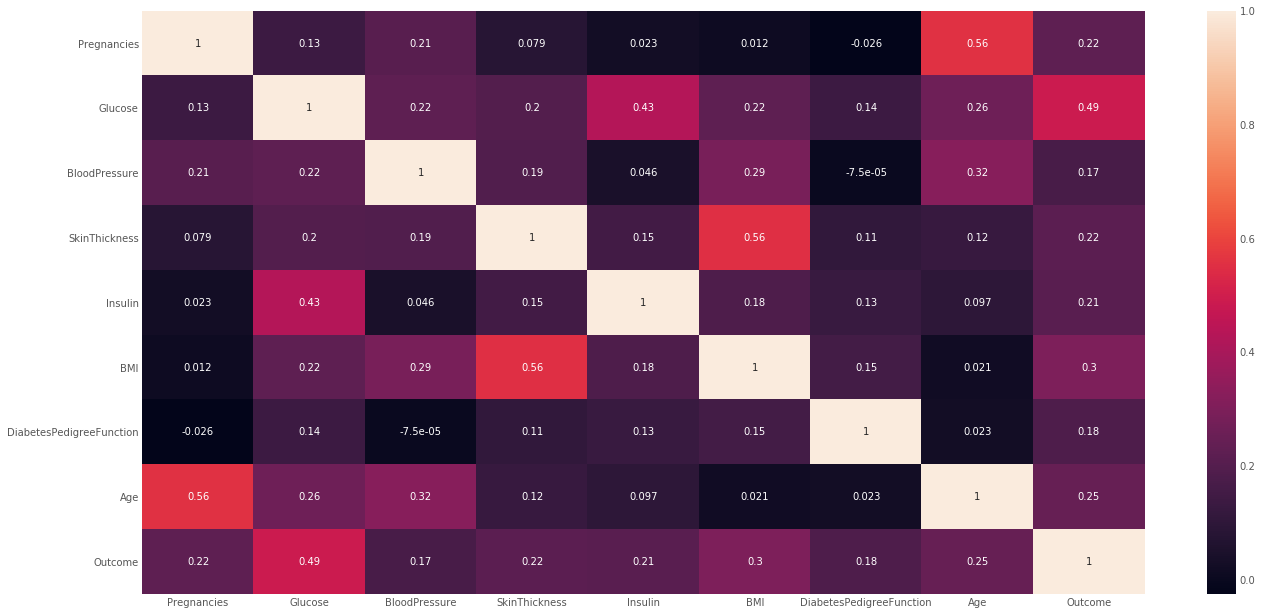

In [19]:
# Let's check the correlation between the variables 
# Strong correlation between the BMI and SkinThickness, Glucose and Outcome
corr = df.corr()
print(corr)
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True);

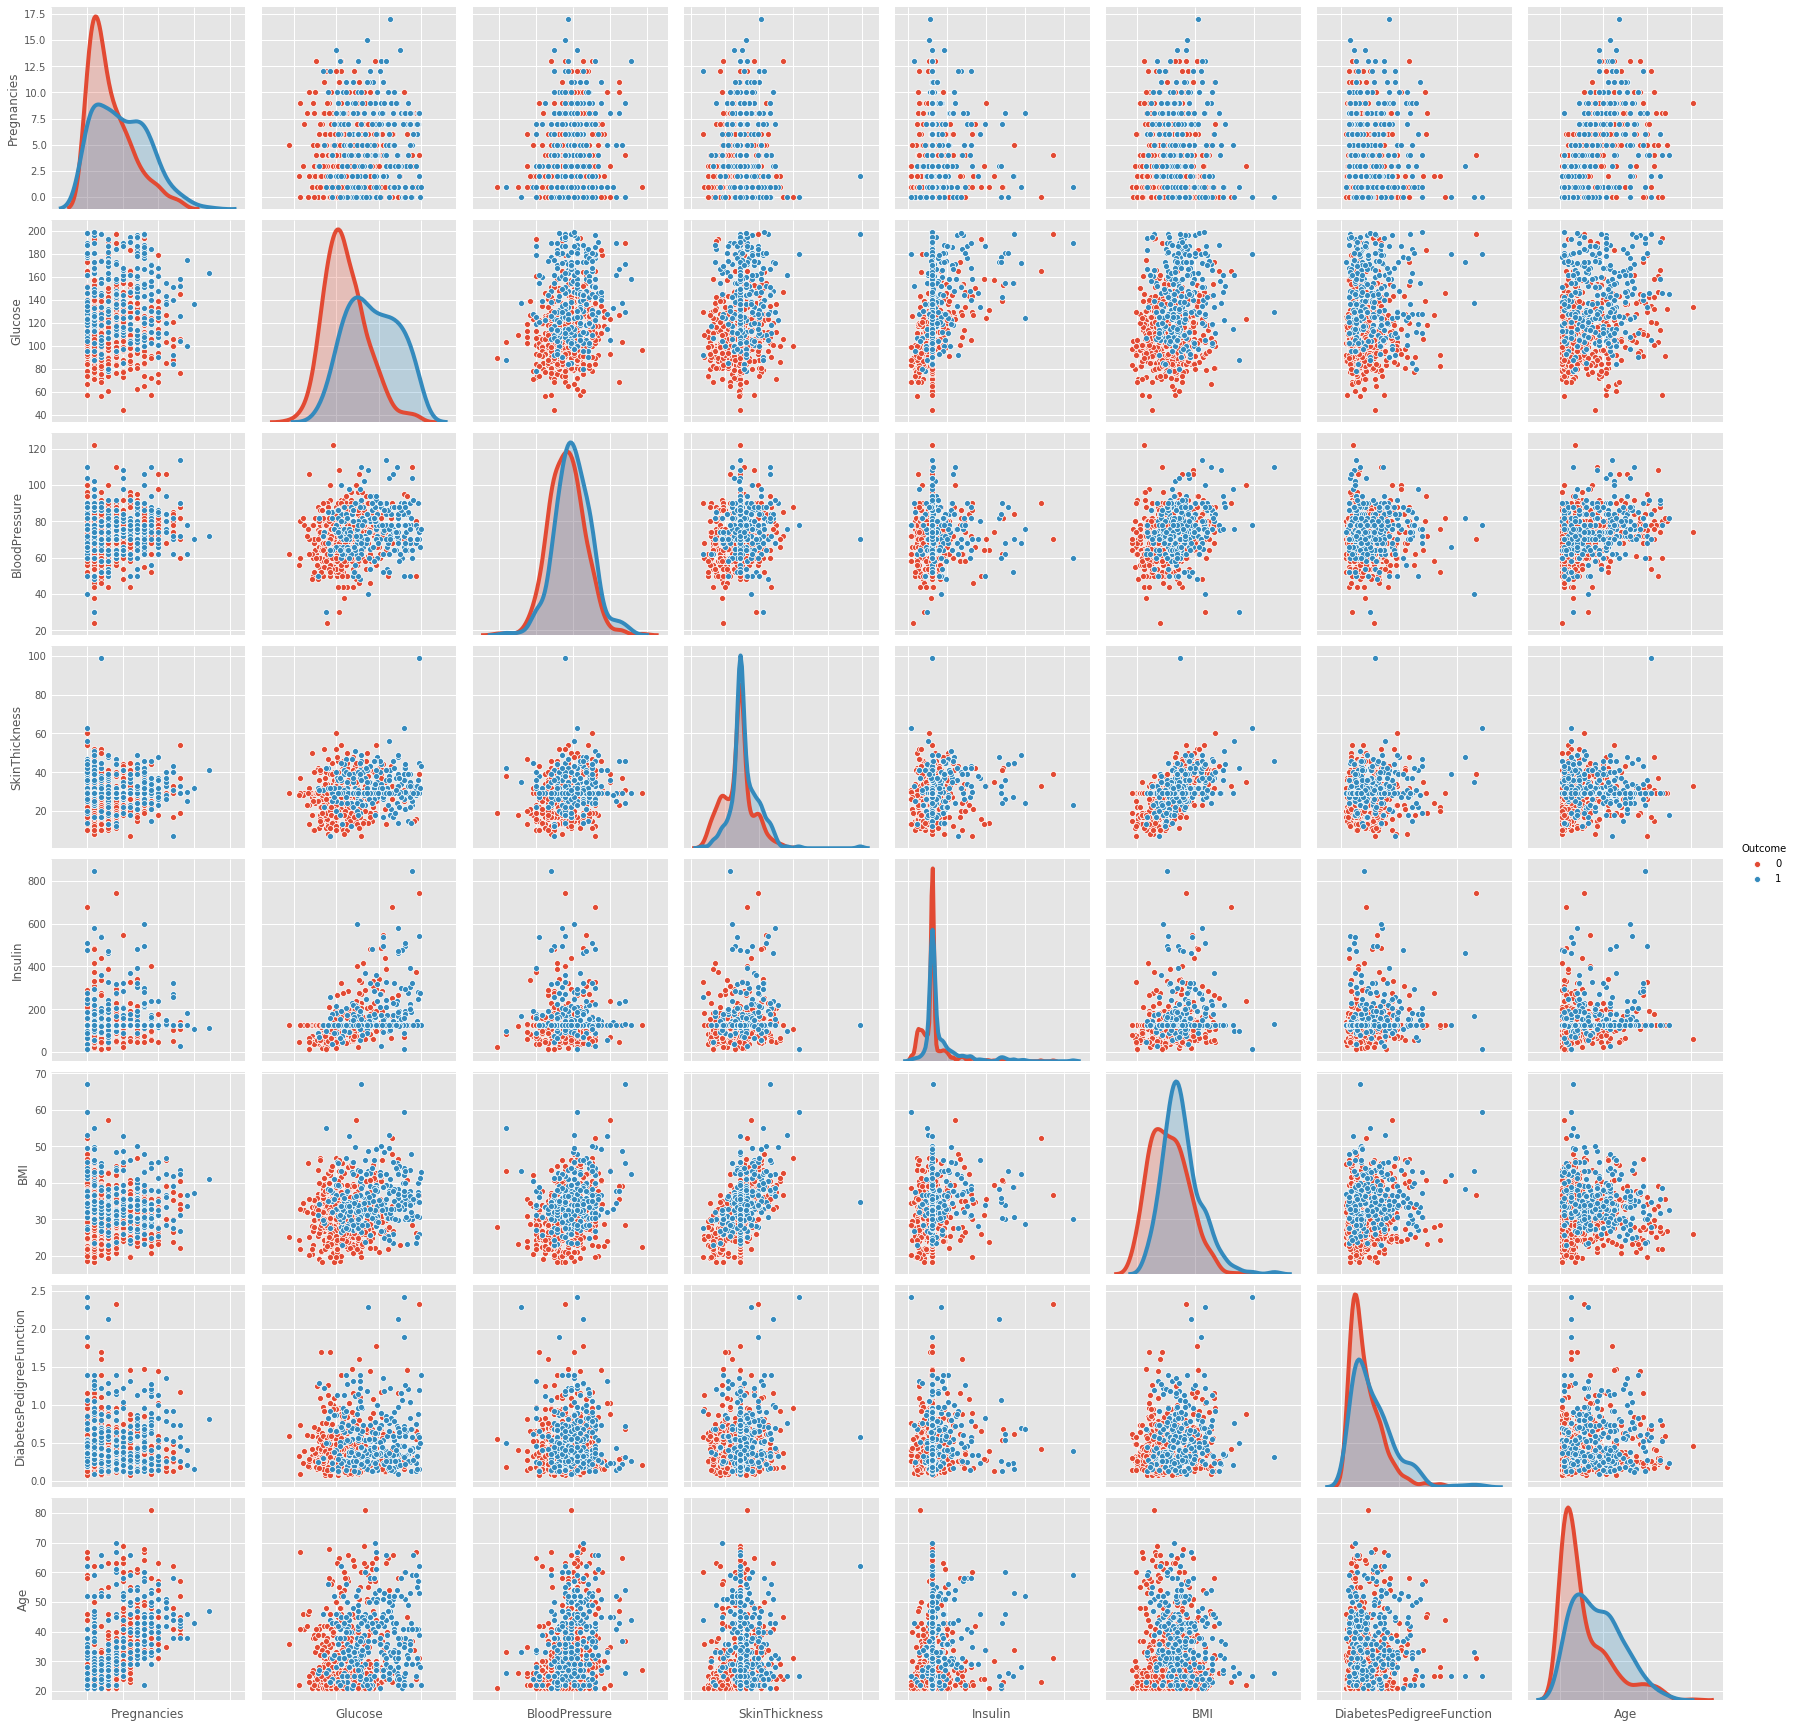

In [20]:
show = sns.pairplot(df, hue='Outcome', size=3, diag_kind='kde')

show.set(xticklabels=[]);

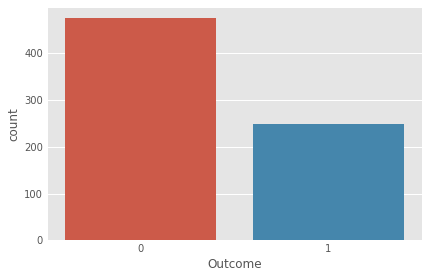

In [21]:
sns.countplot(df['Outcome'], label = "Count");

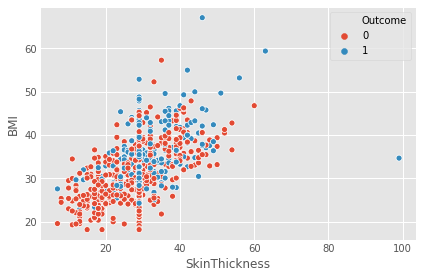

In [22]:
sns.scatterplot(x = 'SkinThickness', y = 'BMI', hue = 'Outcome', data = df);

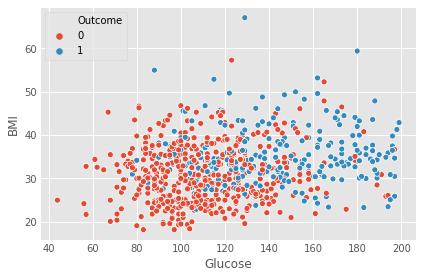

In [23]:
sns.scatterplot(x = 'Glucose', y = 'BMI', hue = 'Outcome', data = df);

## Data Split

In [36]:
#Lets assign the features to the X variable and the response to the y variable
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_names]
y = df.Outcome

In [37]:
# import the ML algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [39]:
# Import Evaluation Methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df.Outcome, random_state=0)

In [40]:
models = []

models.append(('ADABOOST', AdaBoostClassifier()))
models.append(('BAGGING', BaggingClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [41]:
estimators = []
accuracy = []

for estimator, model in models:
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    estimators.append(estimator)

In [42]:
result_df = pd.DataFrame({'Model' : estimators, 'Accuracy' : accuracy})
print(result_df)

      Model  Accuracy
0  ADABOOST  0.767956
1   BAGGING  0.762431
2       MLP  0.662983
3       KNN  0.740331
4       SVC  0.756906
5        LR  0.779006
6        DT  0.712707
7       GNB  0.729282
8        RF  0.751381
9        GB  0.756906


In [43]:
# K-Fold Cross Validation
estimators = []
accuracies = []

for estimator, model in models:
    
    
    cv = KFold(n_splits=10,  random_state=0)
    accuracy= cross_val_score(model, X, y, cv = cv, scoring='accuracy').mean()
    
    accuracies.append(accuracy)
    estimators.append(estimator)

cv_df = pd.DataFrame({'Model': estimators , 'Accuracy': accuracies})
print(cv_df)

      Model  Accuracy
0  ADABOOST  0.739136
1   BAGGING  0.736530
2       MLP  0.693588
3       KNN  0.722565
4       SVC  0.761320
5        LR  0.766724
6        DT  0.705765
7       GNB  0.748763
8        RF  0.777892
9        GB  0.779243


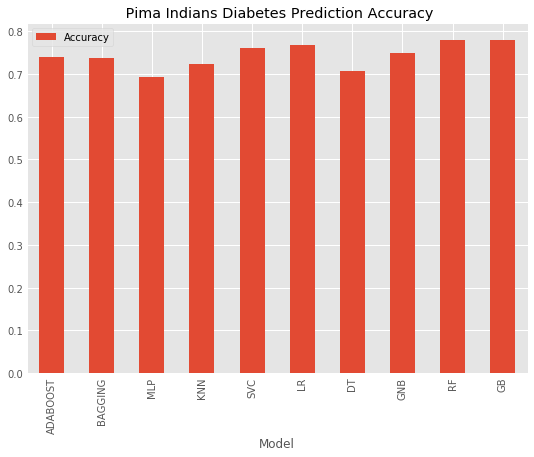

In [44]:
# Plotting the accuracy scores of all models
cv_df.plot(x='Model', y='Accuracy', kind='bar', figsize=(8, 6), title=' Pima Indians Diabetes Prediction Accuracy', 
               sort_columns=True );

In [45]:
# From train_test_split method, Logistic Regression has the highest accuracy scores of 0.779 %. 
# However, from K-Fold Cross Validation method, Gradient Boosting classifier has managed to achieve a classification accuracy of 77.930 %, which is greater than 
# the accuracy of the KNN modelwhic has only 72.25%. 
# Therefore, Gradient Boosting is selected as the prime candidate for the next phase.

## Feature Engineering

In [47]:
from sklearn.feature_selection import RFECV

gbr = GradientBoostingClassifier()

rfecv = RFECV(gbr, step=1, cv=10, scoring='accuracy')
rfecv = rfecv.fit(X, y)
rfecv.support_

array([ True,  True, False, False,  True,  True,  True,  True])

In [49]:
rfecv.n_features_

6

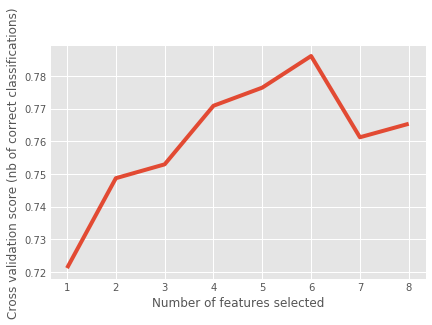

In [50]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
# from the plot we can see that inputting 6 features to the model gives the best accuracy score. 

In [51]:
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [52]:
feature_importance = list(zip(feature_names, rfecv.support_))
feature_importance

[('Pregnancies', True),
 ('Glucose', True),
 ('BloodPressure', False),
 ('SkinThickness', False),
 ('Insulin', True),
 ('BMI', True),
 ('DiabetesPedigreeFunction', True),
 ('Age', True)]

In [53]:
new_features= []
for feature, importance in feature_importance:
    if importance == True:
        new_features.append(feature)
print(new_features)

['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [54]:
# Lets select those 6 input features for maximum accuracy
X_new = df[new_features]

initial_score = cross_val_score(gbr, X, y, cv=10, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))

new_score = cross_val_score(gbr, X_new, y, cv=10, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(new_score))

Initial accuracy : 0.7694444444444445 
Accuracy after Feature Selection : 0.784703196347032 


## IMPROVING THE MODEL via Parameter Tuning

In [79]:
from sklearn.model_selection import GridSearchCV

In [84]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.1],
    "min_samples_split": [3,4,5],
    "min_samples_leaf": [3,4,5],
    "max_depth":[1,3],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 1.0],
    "n_estimators":[100,200]
    }

In [85]:
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, scoring = 'accuracy', n_jobs=-1, verbose=2)
clf.fit(X_new, y)
print(clf.best_params_)
print(clf.best_estimator_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  7.4min finished


{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 200, 'subsample': 1.0}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## K-Fold Cross Validation

In [132]:
# We can feed the best parameters to the Gradient Boosting model and observe whether it’s accuracy has increased
clf_grid = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=200,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split= 3,
    max_depth=3,
    random_state= 0,
    max_features='log2',
    min_samples_leaf = 3
    )

grid_score = cross_val_score(clf_grid, X_new, y, cv=10, scoring='accuracy').mean()
print("New Accuracy after GridSearch : {} ".format(grid_score))

New Accuracy after GridSearch : 0.7763127853881279 


In [133]:
clf_grid.fit(X_new,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [134]:
grid_predictions = clf_grid.predict(X_new)

In [135]:
print(grid_predictions)

[1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1
 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 

[[463  12]
 [ 38 211]]


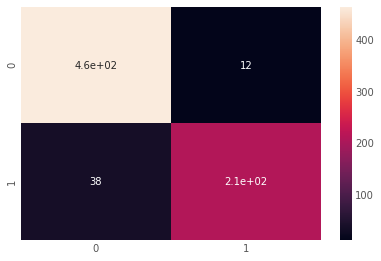

In [136]:
cm = confusion_matrix(y, grid_predictions)
print(cm)
sns.heatmap(cm, annot=True);

In [137]:
print(classification_report(y,grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       475
           1       0.95      0.85      0.89       249

    accuracy                           0.93       724
   macro avg       0.94      0.91      0.92       724
weighted avg       0.93      0.93      0.93       724



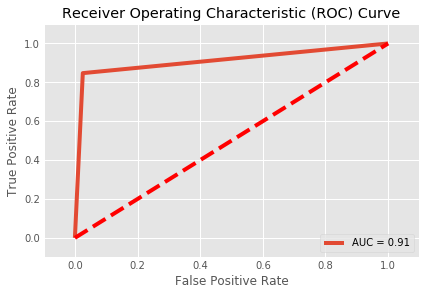

In [162]:
fpr, tpr, _ = metrics.roc_curve(y, grid_predictions)
auc_score = metrics.auc(fpr, tpr)
#[fpr=false-positive-rate]
# [tpr=true-positive-rate]
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right');

The above curve indicates that the model dishtinguishes the positive and negative values by 91%.

## Train/Test Split 

In [138]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new, y, stratify = df.Outcome, random_state=0)

In [139]:
X_train1.shape

(543, 6)

In [140]:
X_test1.shape

(181, 6)

In [141]:
y_train1.shape

(543,)

In [142]:
y_test1.shape

(181,)

In [143]:
# We can feed the best parameters to the Gradient Boosting model and observe whether it’s accuracy has increased
clf2_grid = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=200,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split= 3,
    max_depth=3,
    random_state= 0,
    max_features='log2',
    min_samples_leaf = 3
    )

clf2_grid.fit(X_train1, y_train1)
print("Accuracy on training set: {:.3f}".format(clf2_grid.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(clf2_grid.score(X_test1, y_test1)))

Accuracy on training set: 0.959
Accuracy on test set: 0.762


In [144]:
y_predict = clf2_grid.predict(X_test1)

[[103  16]
 [ 27  35]]


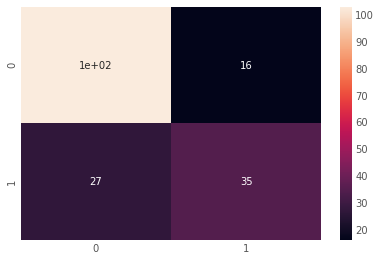

In [145]:
cm1 = confusion_matrix(y_test1, y_predict)
print(cm1)
sns.heatmap(cm1, annot=True);

In [146]:
# We are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by 
# limiting the maximum depth or lower the learning rate as follows:
clf3_grid = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    max_depth=1,
    random_state= 0,
    max_features='log2',
   
    )

clf3_grid.fit(X_train1, y_train1)
print("Accuracy on training set: {:.3f}".format(clf3_grid.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(clf3_grid.score(X_test1, y_test1)))

Accuracy on training set: 0.810
Accuracy on test set: 0.757


In [153]:
clf4_grid = GradientBoostingClassifier(random_state=0, 
                                       max_depth=1, 
                                       learning_rate=0.01,
                                       n_estimators=100,
                                      criterion='friedman_mse')

clf4_grid.fit(X_train1, y_train1)
print("Accuracy on training set: {:.3f}".format(clf4_grid.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(clf4_grid.score(X_test1, y_test1)))

Accuracy on training set: 0.762
Accuracy on test set: 0.762


In [154]:
y_predict1 = clf4_grid.predict(X_test1)

In [156]:
print(classification_report(y_test1,y_predict1))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       119
           1       0.81      0.40      0.54        62

    accuracy                           0.76       181
   macro avg       0.78      0.68      0.69       181
weighted avg       0.77      0.76      0.74       181



[[113   6]
 [ 37  25]]


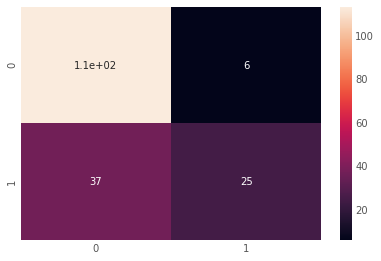

In [157]:
cm2 = confusion_matrix(y_test1, y_predict1)
print(cm2)
sns.heatmap(cm2, annot=True);

Interpretations:
High precision value, recall >0.5, and high F1 score indicate the good performance of the model.
TN=113 means actually no Diabetes in 113 people, predicted also the same.
TP=25 means actual number of people with Diabetes is 25, prediction also the same.
FP=6 means 6 people doesn't have Diabetes in reality , but the prediction shows them to have diabetes.
FN=37 means actual class shows that 37 people does have Diabetes, but the prediction shows them no diabetes.

## ROC Curve Metrics

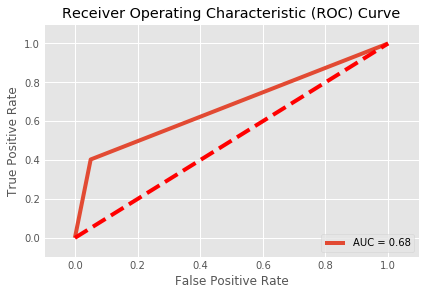

In [131]:
fpr, tpr, _ = metrics.roc_curve(y_test1, y_predict1)
auc_score = metrics.auc(fpr, tpr)
#[fpr=false-positive-rate]
# [tpr=true-positive-rate]
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

The above curve indicates that the model dishtinguishes the positive and negative values by 68%.

## Dashboard with Charts in Tableau

https://public.tableau.com/profile/udendra7739#!/vizhome/DashboardforHealthcareProject1_15928514298670/Dashboard1?publish=yes